Link to Medium blog post: https://towardsdatascience.com/stop-one-hot-encoding-your-time-based-features-24c699face2f

# Stop One-Hot Encoding your Time-based Features

Feature Engineering is an essential component of the data science model development pipeline. A data scientist spends most of the time analyzing and preparing features to train a robust model. A raw dataset consists of various types of features including categorical, numerical, time-based features.

A machine learning or deep learning model understands only numerical vectors. The categorical and time-based features need to be encoded into the numerical format. There are various feature engineering strategies to encode categorical features include One-Hot Encoding, Count Vectorizer, and many more.

Time-based features include the day of month, day of week, day of year , time. Time-based features are cyclic or seasonal in nature. In this article, we will discuss why One-Hot encoding or dummy encoding should be avoided for cyclic features, instead discuss and implement a better and elegant solution.

### Why NOT One-Hot Encoding?

One-hot Encoding is a feature encoding strategy to convert categorical features into a numerical vector. For each feature value, the one-hot transformation creates a new feature demarcating the presence or absence of feature value.

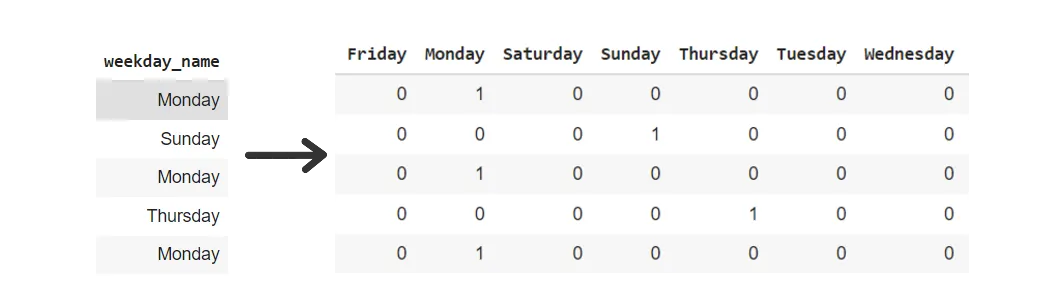

One-hot encoding creates d-dimensional vectors for each instance where d is the unique number of feature values in the dataset.

For a feature having a large number of unique feature values or categories, one-hot encoding is not a great choice. There are various other techniques to encode the categorical (ordinal or nominal) features.

Time-based features such as day of month, day of week, day of year, etc have a cyclic nature and have many feature values. One-hot encoding day of monthfeature results in 30 dimensionality vector, day of year results in 366 dimension vector. It’s not a great choice to one-hot encode these features, as it may lead to a curse of dimensionality.

### Idea:

The elegant solution to encode these cyclic features can be using mathematical formulation and trigonometry. In this article, we will encode the cyclic features using the basic formulation of trigonometry, by computing the sin and cosine of the features.

In [1]:
# import  required libraries
import numpy as numpy
import pandas as pd

In [2]:
def transformation(column):
  max_value = column.max()
  sin_values = [math.sin((2*pi*x)/max_value) for x in list(column)]
  cos_values = [math.cos((2*pi*x)/max_value) for x in list(column)]
  return sin_values, cos_values

day of week the feature has 7 unique feature values. Taking the sin and cosine of the feature values will create 2 dimensionality features.

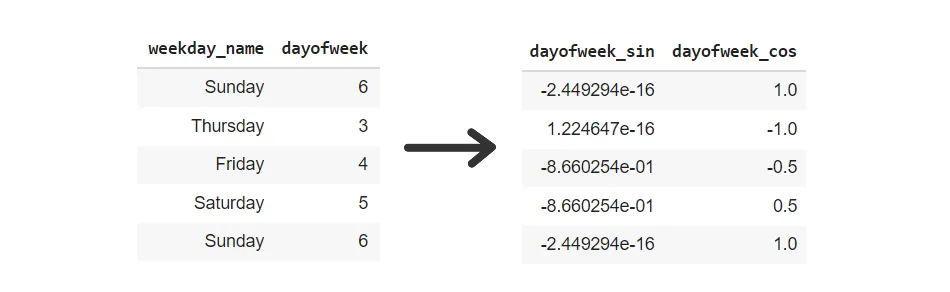

Now, instead of creating a 7-dimensionality feature vector using One-hot encoding, a 2-dimensional transformed feature vector will serve the purpose to represent the entire feature. Now, let's visualize the new 2-dimensional transformed feature vector with a scatterplot.

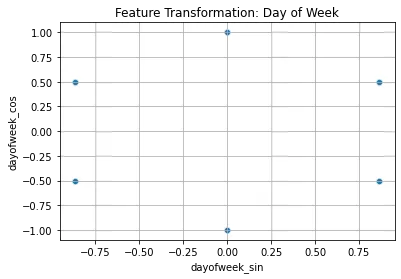

The scatterplot clearly shows the cyclic nature of the day of week feature. The 7-feature values (from 0 to 6) are now encoded into a 2-dimensional vector.

The day of month and day of year are cyclic in nature and having 31 and 366 feature values respectively. One-hot encoding them will increase the dimensionality of the final dataset. So, using trigonometric transformation of the feature values will serve the purpose of encoding the categorical features.

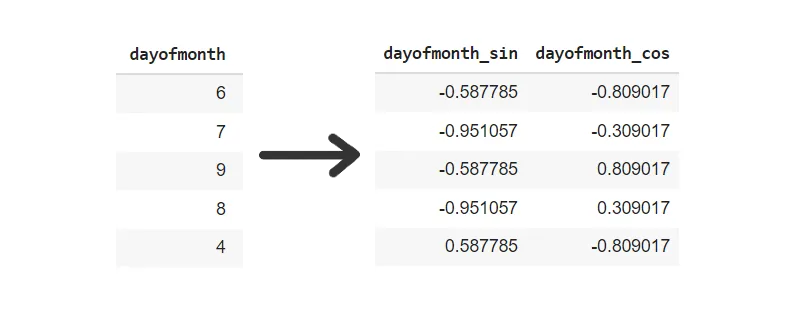

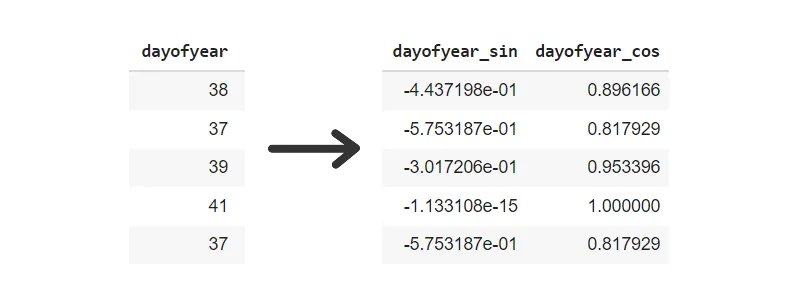